## Assume you are appointed as a Data scientist in any international humanitarian NGO, after the recent funding programmes, have been able to raise around 120 million dollar. Now the CEO of the NGO call you to choose how to use this money strategically and effectively. The significant issues that comes while making this conclusion are mostly related to choosing the countries that are in the direst need of aid. Your job is to classify the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. Apply Principal component analysis, K-Means Clustering &amp; Hierarchical Clustering.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
##  changing country column to index because its non-numerical

data.set_index('country', inplace = True)


In [8]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# changing per total gdp to per total gdpp

data['health'] = (data['health'] * data['gdpp']) / 100
data['imports'] = (data['imports'] * data['gdpp']) / 100
data['income'] = (data['income'] * data['gdpp']) / 100

data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


# Data Viz

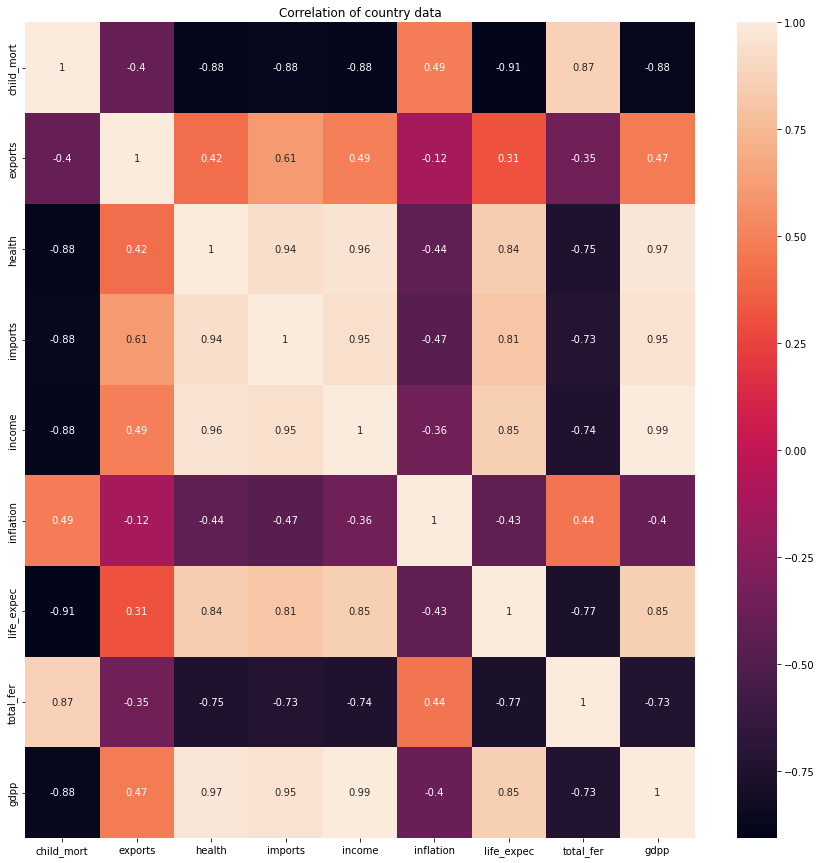

In [10]:
plt.figure(figsize = (15,15))
plt.title('Correlation of country data')
sns.heatmap(data.corr(method = 'spearman'), annot = True)
plt.show()

In [11]:
# scaling the data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)

scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,-0.565040,-0.432276,-0.419624,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.439218,-0.313677,-0.388521,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.484826,-0.353720,-0.375272,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-0.532363,-0.345953,-0.404013,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.178771,0.040735,-0.237868,-0.601749,0.704258,-0.541946,-0.041817


# Principal Component Analysis

In [12]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver = 'randomized', random_state = 100)   # create
pca.fit(scaled_data)                                       # fit



PCA(random_state=100, svd_solver='randomized')

In [13]:
# define components in new DF

column_names = list(scaled_data.columns)
pca_df = pd.DataFrame({'PCA_1' : pca.components_[0], 'PCA_2' : pca.components_[1], 'Feature' : column_names})
pca_df.head()

,PCA_1,PCA_2,Feature
0,-0.335127,0.471890,child_mort
1,0.260650,0.196891,exports
2,0.369411,0.174463,health
3,0.356568,0.363929,imports
4,0.361927,0.364126,income


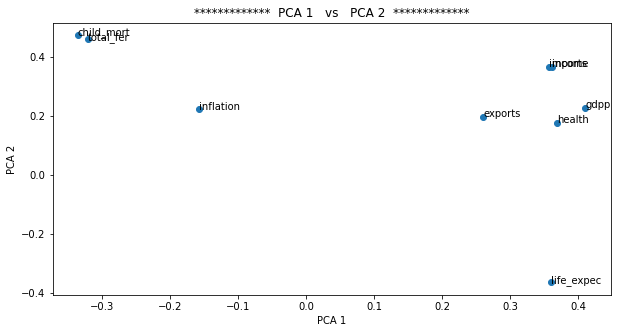

In [14]:
# plot PCA_1 & PCA_2 in scatter plot

plt.figure(figsize = (10,5))

plt.title('*************  PCA 1   vs   PCA 2  *************')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(pca_df.PCA_1, pca_df.PCA_2)

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PCA_1[i], pca_df.PCA_2[i]))

plt.show()

In [15]:
# checking variance ratio

print('PCA Variance Ratio : ',pca.explained_variance_ratio_)

PCA Variance Ratio :  [0.54475534 0.1801119  0.10224621 0.09537347 0.02540409 0.02425824
 0.01643517 0.00943709 0.0019785 ]


In [16]:
# outliers analysis

round(scaled_data.describe(percentiles = [0.05, 0.95]), 2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.89,-1.50,-0.58,-0.45,-0.42,-1.14,-4.34,-1.19,-0.70
5%,-0.87,-1.06,-0.57,-0.44,-0.42,-0.72,-1.67,-1.03,-0.68
50%,-0.47,-0.22,-0.41,-0.31,-0.38,-0.23,0.29,-0.36,-0.45
95%,1.93,1.44,2.18,1.20,1.43,1.24,1.22,1.93,1.95
max,4.22,5.81,4.24,9.72,7.12,9.13,1.38,3.01,5.04


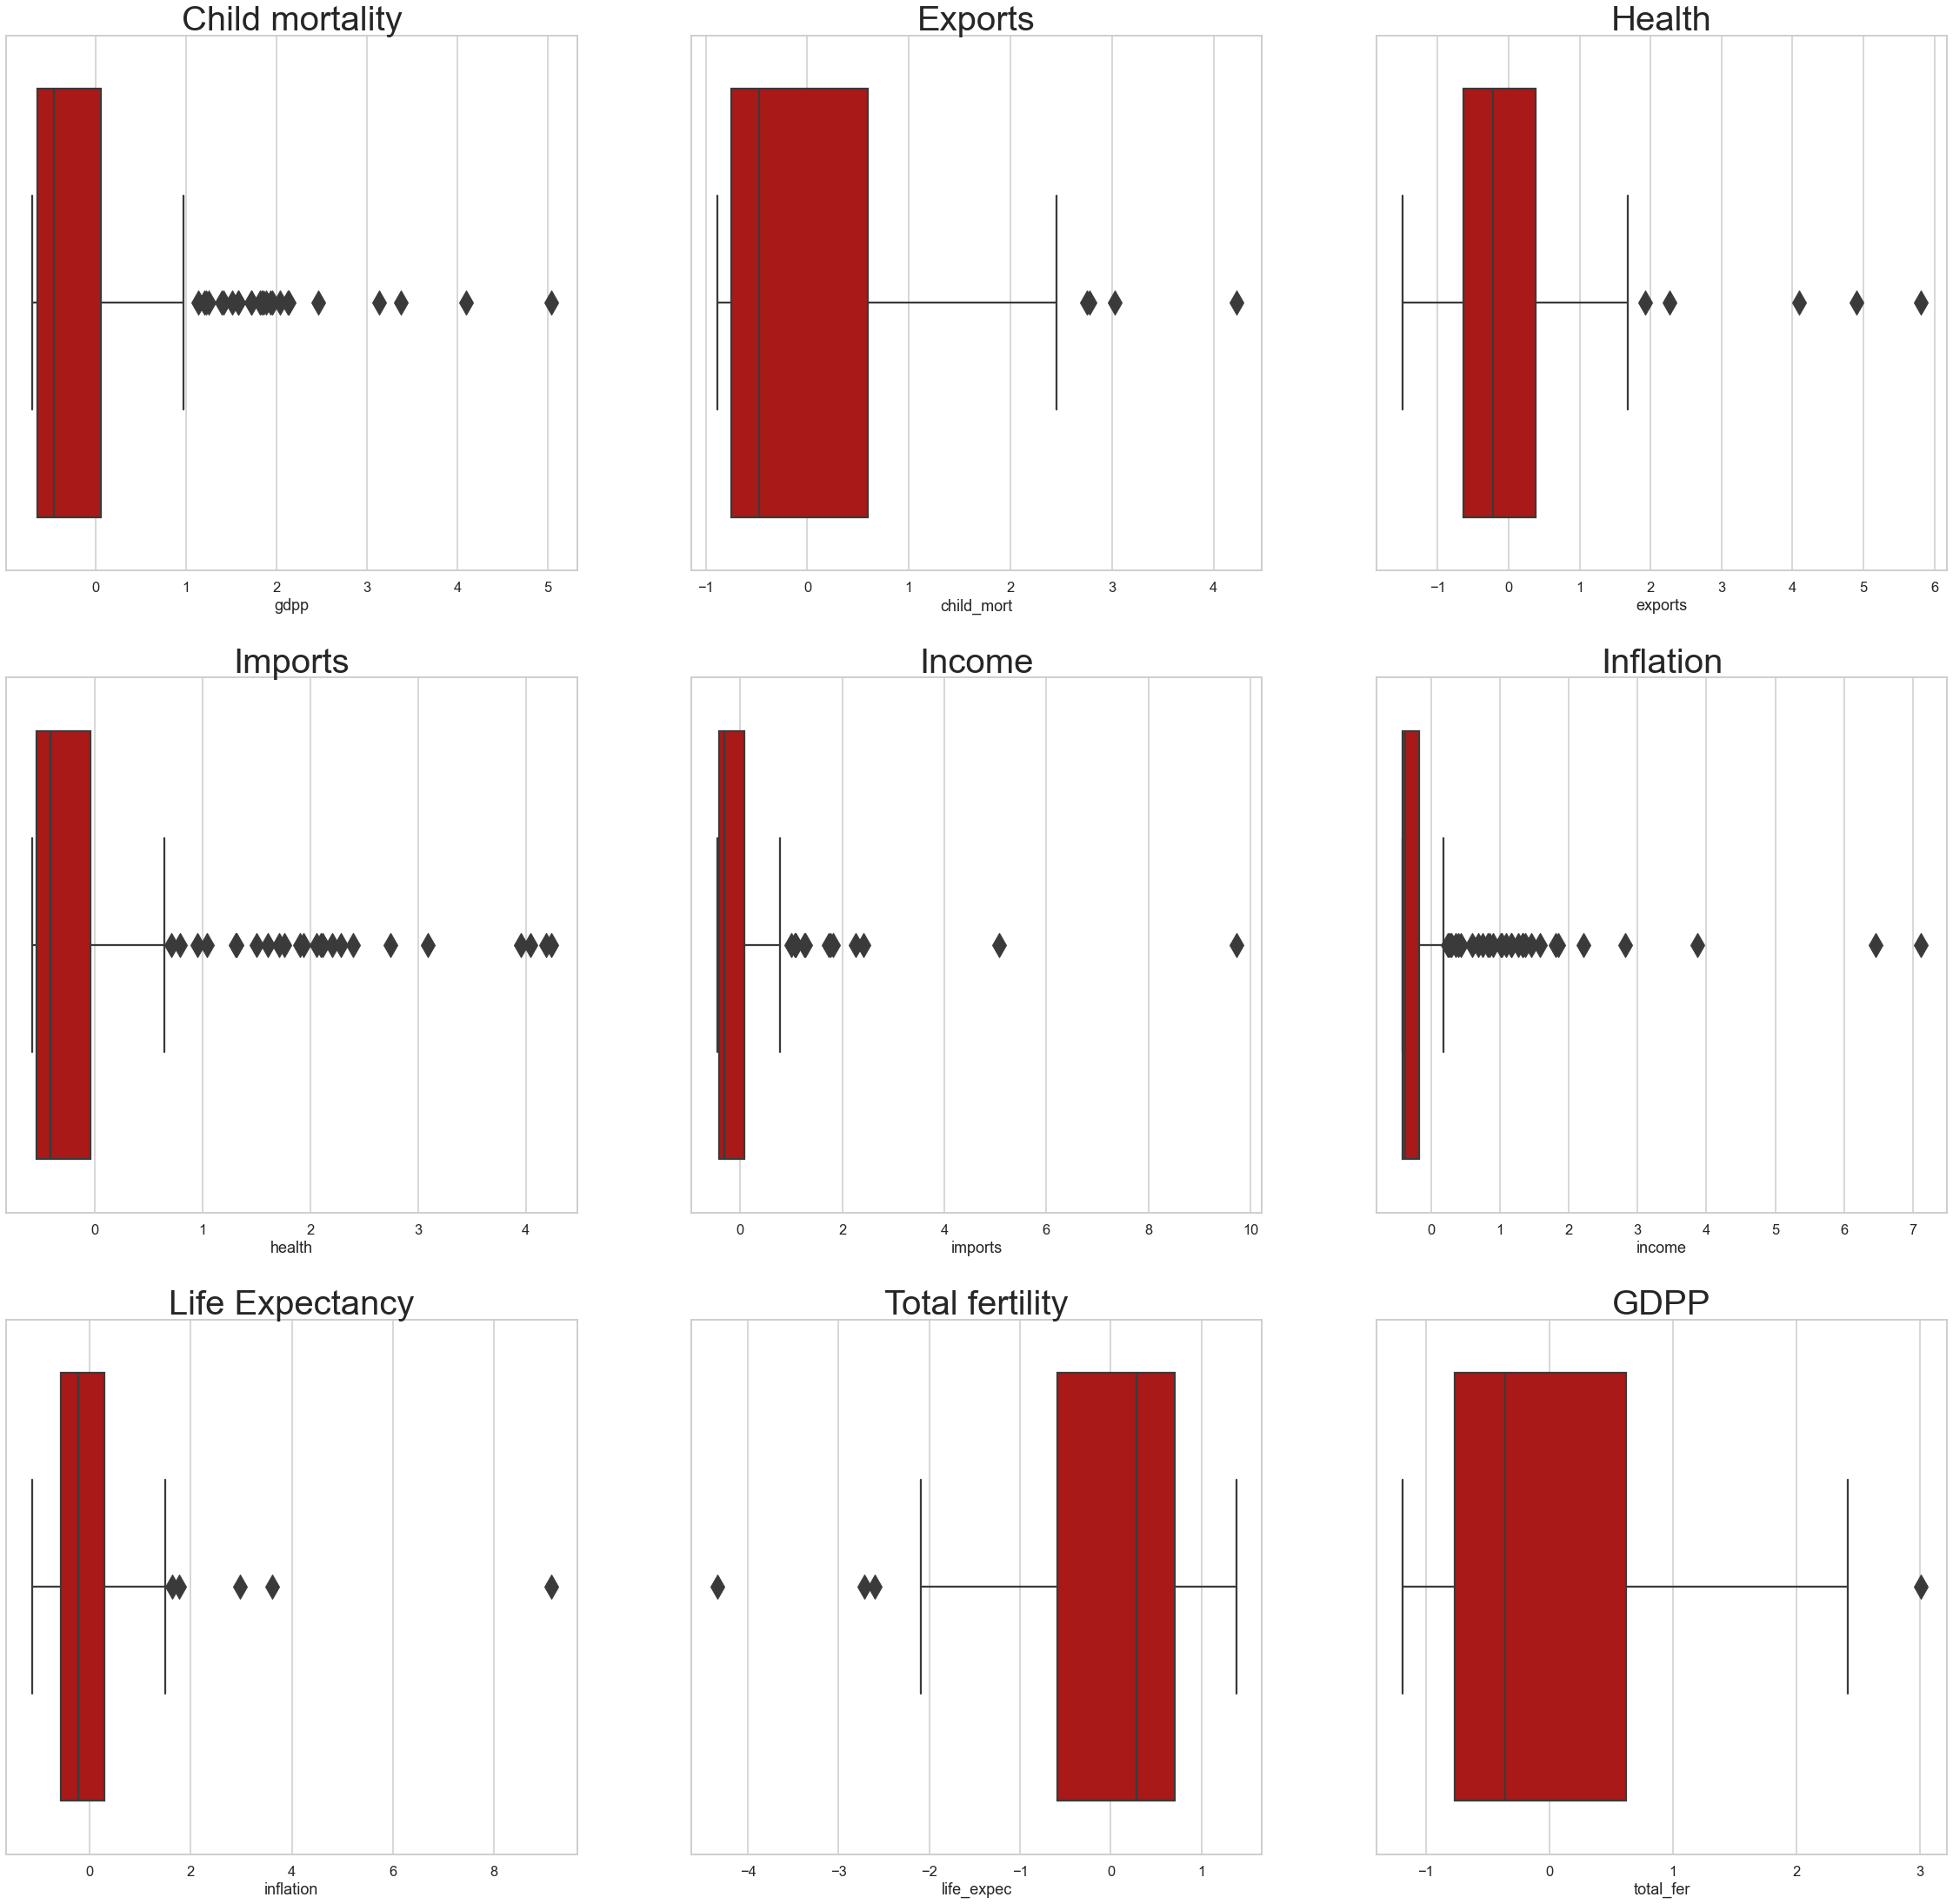

In [17]:
# checking outliers in boxplot

plt.figure(figsize = (40,120))
plt.tight_layout()

sns.set_style('whitegrid')
sns.set_context('talk')

col = { 0 : 'Child mortality', 1 : 'Exports', 2 : 'Health', 3 : 'Imports', 4: 'Income',
       5 : 'Inflation', 6 : 'Life Expectancy', 7 : 'Total fertility', 8 : 'GDPP'}

for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.title(col[i], fontsize = 40)
    sns.boxplot(x = scaled_data.columns[i-1], data = scaled_data, palette = 'gist_heat', orient = 'h', fliersize = 20)

## Excluding the outliers for analysis

In [18]:
new_scaled_data = scaled_data

col = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for i in range(len(col)):
    lower = new_scaled_data[col[i]].quantile(0.05)
    upper = new_scaled_data[col[i]].quantile(0.95)
    IQR = upper - lower
    
    new_scaled_data = new_scaled_data[(new_scaled_data[col[i]] >= lower - 1.5 * IQR) & 
                                      (new_scaled_data[col[i]] <= upper + 1.5 * IQR)]

# K-Means Clustering 

In [19]:
from sklearn.decomposition import IncrementalPCA

In [20]:
pca_analysis = IncrementalPCA(n_components = 5)

new_pca_scaled = pca_analysis.fit_transform(new_scaled_data)

new_pca_scaled.shape

(163, 5)

<AxesSubplot:title={'center':'Correlation Coeff of New Scaled PCA '}>

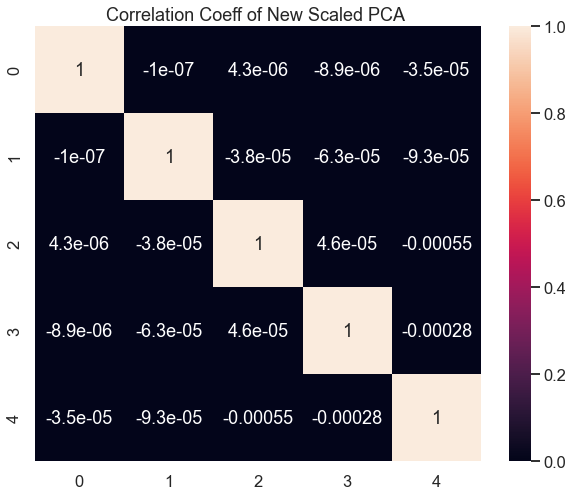

In [21]:
# check correlation coeff of new pca 

corr_pca = np.corrcoef(new_pca_scaled.transpose())

plt.figure(figsize = (10,8))

plt.title('Correlation Coeff of New Scaled PCA ')

sns.heatmap(corr_pca, annot = True)

In [22]:
# checking MAX & MIN of corr_coeff

corr_pca_min_max = corr_pca - np.diagflat(corr_pca.diagonal())
print('Max Correlation : ', corr_pca_min_max.max(), '\nMin Correlation :', corr_pca_min_max.min())

Max Correlation :  4.6379871438375614e-05 
Min Correlation : -0.0005498695277183078


In [23]:
# create new DF for new PCA scaled data

new_scaled_data = pd.DataFrame(new_pca_scaled)
new_scaled_data = new_scaled_data.rename(columns = { 0 : 'PCA_1', 1 : 'PCA_2', 2 : 'PCA_3', 3 : 'PCA_4', 4 : 'PCA_5'})
new_scaled_data.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-2.847871,1.144788,-0.494701,0.023511,0.236525
1,0.401720,-1.240176,-0.633937,-0.196395,-0.048374
2,-0.134213,-0.891289,-0.023847,0.881207,0.331817
3,-2.801301,1.306709,1.518211,0.998792,0.408088
4,0.890923,-0.800705,-0.028707,-0.432520,0.288040


## Silhouette analysis

In [24]:
# saving old dataset in new dataset by resetting index & removing old cluster labels
import warnings
warnings.filterwarnings('ignore')

data = data.reset_index()
new_data = data.iloc[new_scaled_data.index]


In [25]:
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
# silhoutte analysis

cluster_range = [2,3,4,5,6,7,8,9]

for i in cluster_range:
    kmeans_new = KMeans(n_clusters = i, max_iter = 200)
    kmeans_new.fit(new_scaled_data)
    cluster_labels = kmeans_new.labels_
    
    Silhouette_Score = silhouette_score(new_scaled_data, cluster_labels)
    
    print('Cluster : {}, Silhouette Score : {}'.format(i, Silhouette_Score))

Cluster : 2, Silhouette Score : 0.3507326854603919
Cluster : 3, Silhouette Score : 0.4185703672514431
Cluster : 4, Silhouette Score : 0.31304661234671455
Cluster : 5, Silhouette Score : 0.264103377043822
Cluster : 6, Silhouette Score : 0.2722329242273512
Cluster : 7, Silhouette Score : 0.25119449902952573
Cluster : 8, Silhouette Score : 0.24381499602772957
Cluster : 9, Silhouette Score : 0.2632471214415328


In [27]:
# cluster = 3 because it shows the high score. Therefore n_clusters = 3

kmeans = KMeans(n_clusters = 3, max_iter = 500, random_state = 42)
kmeans.fit(new_scaled_data)


KMeans(max_iter=500, n_clusters=3, random_state=42)

In [28]:
# new dataset cluster labels

kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2])

In [29]:
# update cluster values in "new_data"

new_data['Cluster_id'] = kmeans.labels_
new_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


In [30]:
# transformation of "new_data", set country as index

new_scaled_data['Cluster_id'] = kmeans.labels_
new_scaled_data.set_index(new_data.country, inplace = True)

new_scaled_data.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,Cluster_id
country,,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525,2
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374,0
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817,0
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088,2
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040,0


### Visualization of PCA 1 & 2

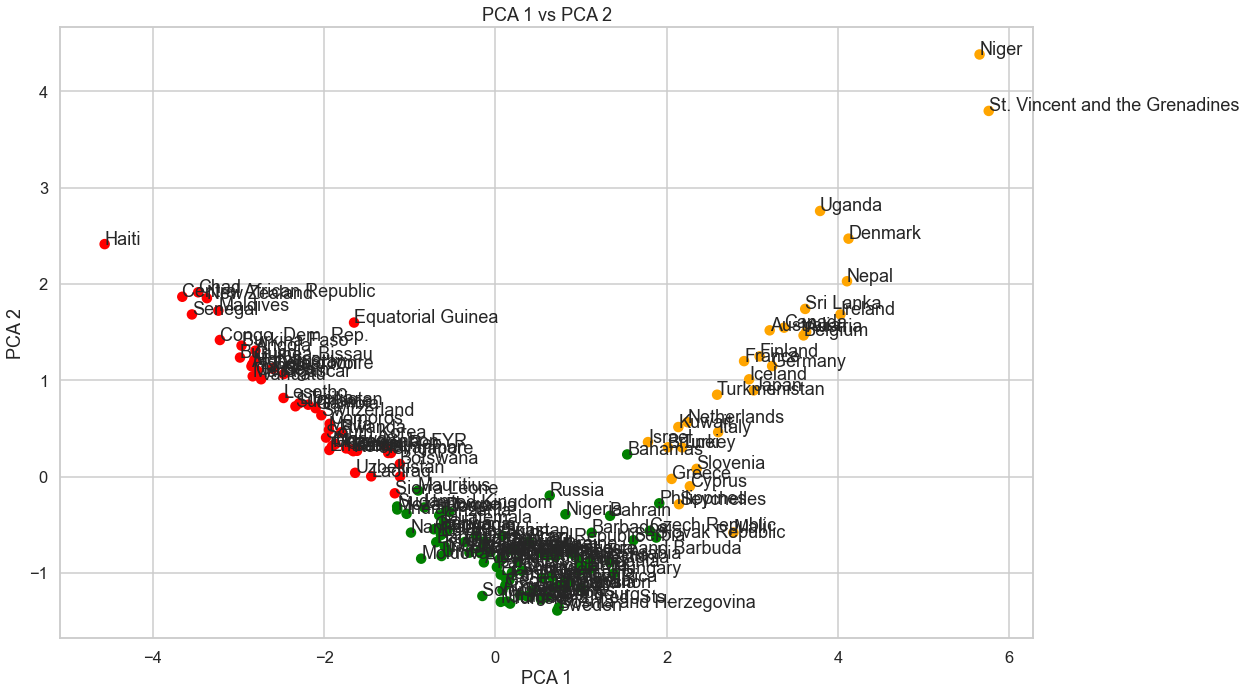

In [31]:
plt.figure(figsize = (15,10))
plt.title('PCA 1 vs PCA 2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()

plt.scatter(new_scaled_data.iloc[:,0], new_scaled_data.iloc[:,1],
           c = new_scaled_data.Cluster_id.map({ 0 : 'green', 1 : 'orange', 2 : 'red'}))

for i, txt in enumerate(new_scaled_data.index):
    plt.annotate(txt,(new_scaled_data.PCA_1[i], new_scaled_data.PCA_2[i]))
    
plt.show()

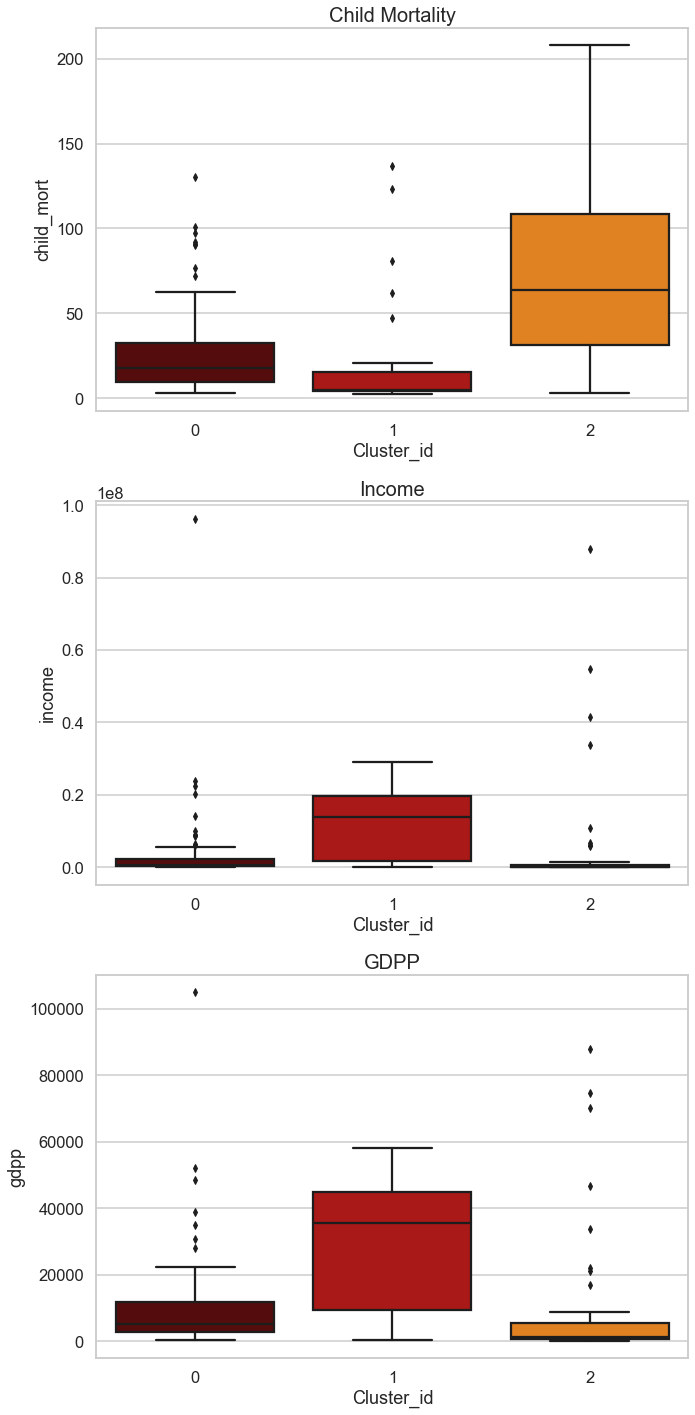

In [32]:
# viz of original variables using box plot (gdpp, income, child_mort)

plt.figure(figsize = (10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)
plt.title('Child Mortality', fontsize = 20)
sns.boxplot(x = new_data['Cluster_id'], y = new_data['child_mort'], data = new_data, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,2)
plt.title('Income', fontsize = 20)
sns.boxplot(x = new_data['Cluster_id'], y = new_data['income'], data = new_data, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,3)
plt.title('GDPP', fontsize = 20)
sns.boxplot(x = new_data['Cluster_id'], y = new_data['gdpp'], data = new_data, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.tight_layout()
plt.show()

#### Cluster 0: gdpp & child mortality are in little difference and in average but income is very less
#### Cluster 1: gdpp is very high, income is average & child mortality is less
#### Cluster 2: child mortality is very high, income & gdpp is less

## therefore help is need to cluster = 2

In [33]:
kmeans_result_help = pd.DataFrame(new_scaled_data[new_scaled_data['Cluster_id'] == 2].index)
kmeans_result_help.shape

# 47 countries are in need of urgent help

(47, 1)

In [34]:
print('**********  COUNTRIES THAT NEEDS URGENT AID  **********\n')
print(kmeans_result_help.values)

**********  COUNTRIES THAT NEEDS URGENT AID  **********

[['Afghanistan']
 ['Angola']
 ['Benin']
 ['Botswana']
 ['Burkina Faso']
 ['Burundi']
 ['Cameroon']
 ['Central African Republic']
 ['Chad']
 ['Comoros']
 ['Congo, Dem. Rep.']
 ['Congo, Rep.']
 ["Cote d'Ivoire"]
 ['Equatorial Guinea']
 ['Eritrea']
 ['Gabon']
 ['Gambia']
 ['Ghana']
 ['Guinea']
 ['Guinea-Bissau']
 ['Haiti']
 ['Iraq']
 ['Kenya']
 ['Kiribati']
 ['Lao']
 ['Lesotho']
 ['Liberia']
 ['Macedonia, FYR']
 ['Madagascar']
 ['Maldives']
 ['Malta']
 ['Morocco']
 ['Myanmar']
 ['New Zealand']
 ['Norway']
 ['Qatar']
 ['Rwanda']
 ['Senegal']
 ['Sierra Leone']
 ['Singapore']
 ['South Korea']
 ['Suriname']
 ['Switzerland']
 ['Tajikistan']
 ['Tonga']
 ['Uzbekistan']
 ['Vanuatu']]


In [35]:
no_help_for_countries = pd.DataFrame(new_scaled_data[new_scaled_data['Cluster_id'] == 1].index)
no_help_for_countries.shape

# 28 countries is in no need of help since its gdpp is high, income & child mortality are average

(28, 1)

In [36]:
print('**********  COUNTRIES THAT NEEDS NO HELP  **********\n')
print(no_help_for_countries.values)

**********  COUNTRIES THAT NEEDS NO HELP  **********

[['Australia']
 ['Austria']
 ['Belgium']
 ['Brunei']
 ['Canada']
 ['Cyprus']
 ['Denmark']
 ['Finland']
 ['France']
 ['Germany']
 ['Greece']
 ['Iceland']
 ['Ireland']
 ['Israel']
 ['Italy']
 ['Japan']
 ['Kuwait']
 ['Mali']
 ['Nepal']
 ['Netherlands']
 ['Niger']
 ['Seychelles']
 ['Slovenia']
 ['Sri Lanka']
 ['St. Vincent and the Grenadines']
 ['Turkey']
 ['Turkmenistan']
 ['Uganda']]


# Hierarchical Clustering

In [37]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [38]:
# use new_scaled_data for hierarchial clustering & remove cluster_id

h_cluster = new_scaled_data.drop('Cluster_id', 1)
h_cluster.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
country,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040


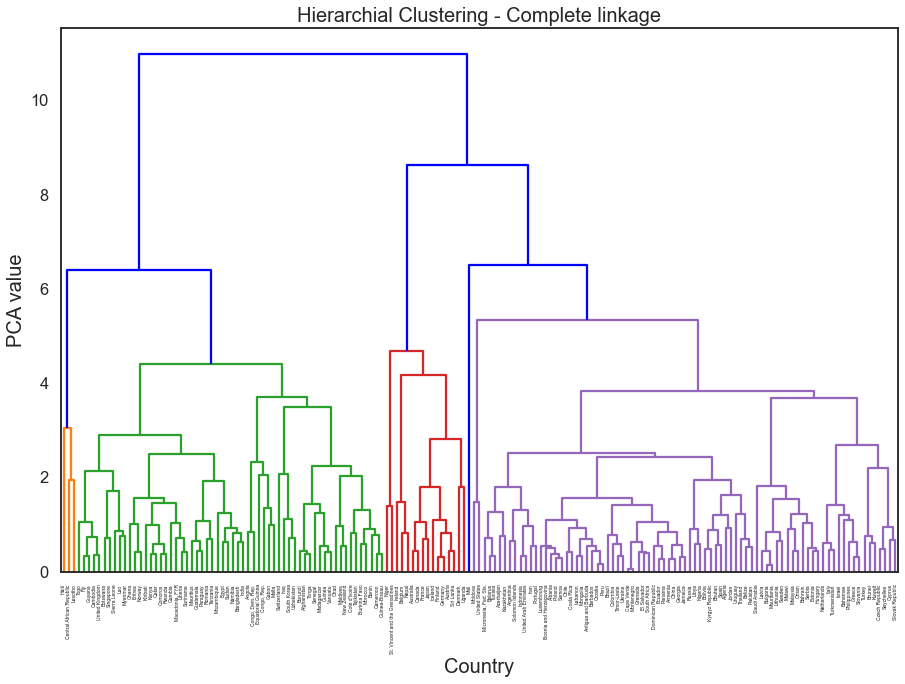

In [39]:
# viz of complete linkage

plt.figure(figsize = (15,10))
sns.set_style('white')

plt.title('Hierarchial Clustering - Complete linkage', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('PCA value', fontsize = 20)

complete_linkage = linkage(h_cluster, method = 'complete', metric = 'euclidean')
dendrogram(complete_linkage, above_threshold_color = 'blue', color_threshold = 5.5, labels = h_cluster.index)

plt.show()

In [40]:
# like k-means, here also cluster = 3, reason - it has high score

cluster_label1 = cut_tree(complete_linkage, n_clusters = 3).reshape(-1, )
cluster_label1

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 0, 0])

In [41]:
# add cluster to dataset "h_cluster"

h_cluster['Cluster_label'] = cluster_label1
h_cluster.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,Cluster_label
country,,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525,0
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374,1
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817,1
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088,0
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040,1


### Viz of original variables in hier. clustering without outliers

In [42]:
# Create new dataset for hier. cluster

data_hier = new_data.drop('Cluster_id', 1)

data_hier['Cluster_level'] = cluster_label1
data_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1


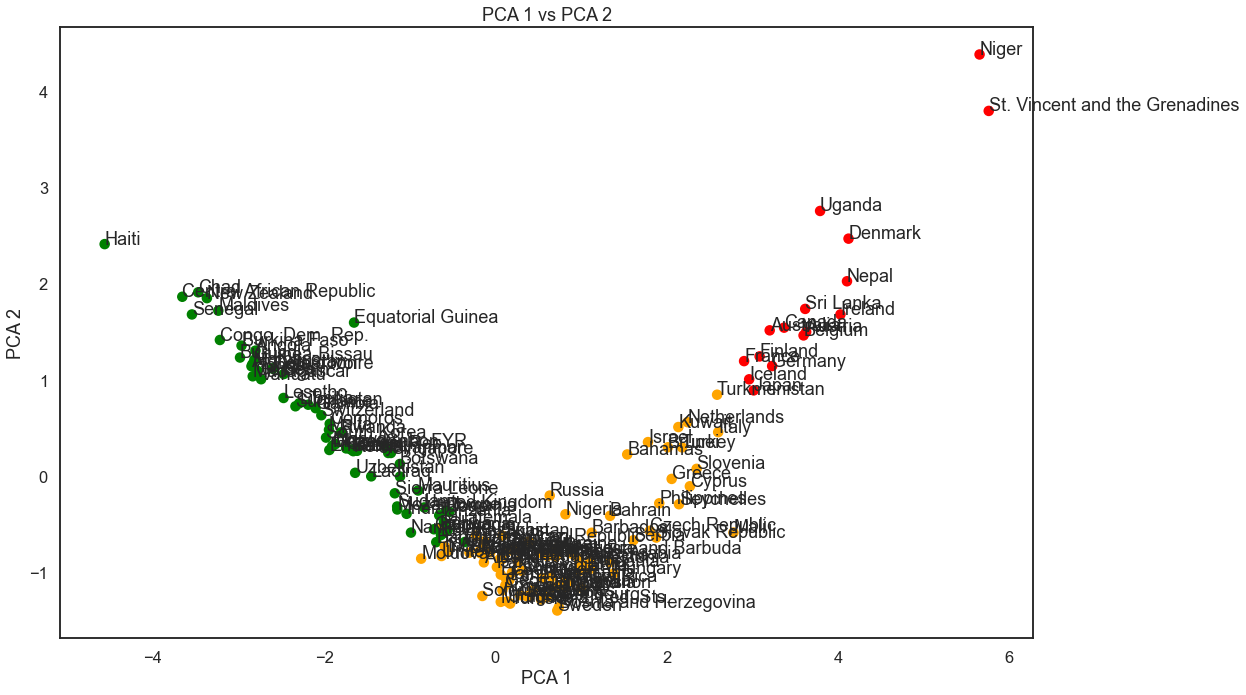

In [43]:
# scatter plot

plt.figure(figsize = (15,10))
plt.title('PCA 1 vs PCA 2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()

plt.scatter(h_cluster.iloc[:,0], h_cluster.iloc[:,1],
           c = h_cluster.Cluster_label.map({ 0 : 'green', 1 : 'orange', 2 : 'red'}))

for i, txt in enumerate(h_cluster.index):
    plt.annotate(txt,(h_cluster.PCA_1[i], h_cluster.PCA_2[i]))
    
plt.show()

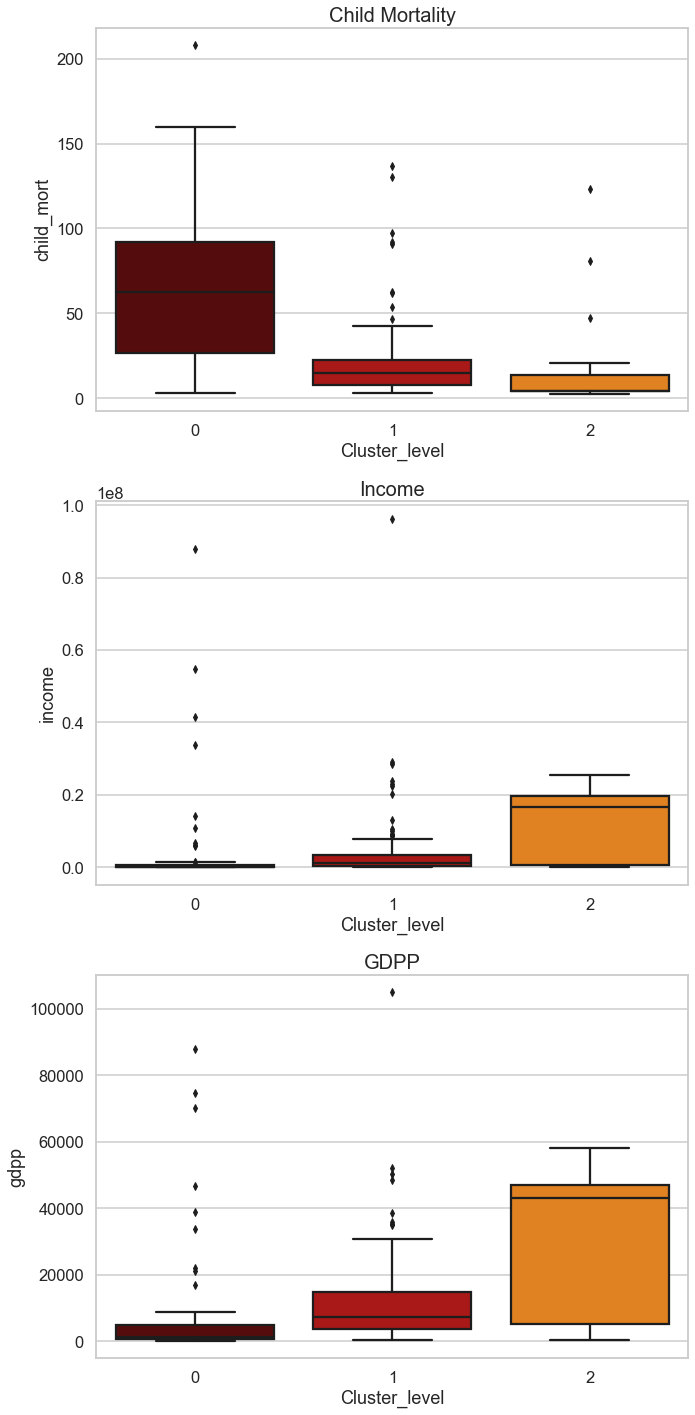

In [44]:
plt.figure(figsize = (10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)
plt.title('Child Mortality', fontsize = 20)
sns.boxplot(x = data_hier['Cluster_level'], y = data_hier['child_mort'], data = data_hier, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,2)
plt.title('Income', fontsize = 20)
sns.boxplot(x = data_hier['Cluster_level'], y = data_hier['income'], data = data_hier, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.subplot(3,1,3)
plt.title('GDPP', fontsize = 20)
sns.boxplot(x = data_hier['Cluster_level'], y = data_hier['gdpp'], data = data_hier, 
            palette = 'gist_heat', orient = 'v', fliersize = 5)

plt.tight_layout()
plt.show()

#### Cluster 0:child mortality is average, income & gdpp is very less
#### Cluster 1: gdpp & child mortality is average, income is very less
#### Cluster 2: gdpp is high, income is average & child mortality is less

## therefore help is need to cluster = 0

In [45]:
h_cluster_with_help = pd.DataFrame(h_cluster[h_cluster['Cluster_label'] == 0].index)
h_cluster_with_help.shape

# 63 countries need urgent aid

(63, 1)

In [46]:
print('**********  COUNTRIES THAT NEEDS URGENT AID  **********\n')
print(h_cluster_with_help.values)

**********  COUNTRIES THAT NEEDS URGENT AID  **********

[['Afghanistan']
 ['Angola']
 ['Bangladesh']
 ['Benin']
 ['Botswana']
 ['Burkina Faso']
 ['Burundi']
 ['Cambodia']
 ['Cameroon']
 ['Central African Republic']
 ['Chad']
 ['Comoros']
 ['Congo, Dem. Rep.']
 ['Congo, Rep.']
 ["Cote d'Ivoire"]
 ['Egypt']
 ['Equatorial Guinea']
 ['Eritrea']
 ['Fiji']
 ['Gabon']
 ['Gambia']
 ['Ghana']
 ['Guatemala']
 ['Guinea']
 ['Guinea-Bissau']
 ['Guyana']
 ['Haiti']
 ['India']
 ['Iraq']
 ['Kenya']
 ['Kiribati']
 ['Lao']
 ['Lesotho']
 ['Liberia']
 ['Macedonia, FYR']
 ['Madagascar']
 ['Maldives']
 ['Malta']
 ['Mauritius']
 ['Morocco']
 ['Mozambique']
 ['Myanmar']
 ['Namibia']
 ['New Zealand']
 ['Norway']
 ['Paraguay']
 ['Qatar']
 ['Romania']
 ['Rwanda']
 ['Senegal']
 ['Sierra Leone']
 ['Singapore']
 ['South Korea']
 ['Sudan']
 ['Suriname']
 ['Switzerland']
 ['Tajikistan']
 ['Tanzania']
 ['Togo']
 ['Tonga']
 ['United Kingdom']
 ['Uzbekistan']
 ['Vanuatu']]


In [47]:
h_cluster_with_no_help = pd.DataFrame(h_cluster[h_cluster['Cluster_label'] == 2].index)
h_cluster_with_no_help.shape

# 16 countries need no help

(16, 1)

In [48]:
print('**********  COUNTRIES THAT NEEDS NO HELP  **********\n')
print(h_cluster_with_no_help.values)

**********  COUNTRIES THAT NEEDS NO HELP  **********

[['Australia']
 ['Austria']
 ['Belgium']
 ['Canada']
 ['Denmark']
 ['Finland']
 ['France']
 ['Germany']
 ['Iceland']
 ['Ireland']
 ['Japan']
 ['Nepal']
 ['Niger']
 ['Sri Lanka']
 ['St. Vincent and the Grenadines']
 ['Uganda']]


# Therefore from the above observation, Hierarchial Clustering model is less when compared to K-Means Clustering.
## K-Means results in 47 countries & hierarchial clustering results in 63 countries which needs urgent aid. Similar for K-means & hierarchial clustering which doesn't needs any help for the countries, K-Means Clustering is the best model